#  Tasks
Tasks
Create a chart, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks:

Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. 

Clean the data. Filter out the following patient segments that represent incorrect data:

diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data
data = pd.read_csv("medical_examination.csv")

In [3]:
#Generate a dataframe
df = pd.DataFrame(data)

In [4]:
#calculating BMI and adding a 'overweight' column
BMI = df['weight'] / (df['height']/ 100) ** 2
df['overweight'] = BMI

In [5]:
#normalizing the data (0 always good, 1 always bad)
df.loc[df.cholesterol == 1, 'cholesterol'] = 0
df.loc[df.gluc == 1, 'gluc'] = 0
df.loc[df.cholesterol > 1, 'cholesterol'] = 1
df.loc[df.gluc > 1, 'gluc'] = 1
df.loc[BMI >= 25, 'overweight'] = 1 
df.loc[BMI < 25, 'overweight'] = 0 

In [6]:
def check_df(df, head=5):
    print('##################### Shape #####################')
    print(df.shape)

    print('##################### Types #####################')
    print(df.dtypes)

    print('##################### Head #####################')
    print(df.head(head))

    print('##################### Tail #####################')
    print(df.tail(head))

    print('##################### is null? #####################')
    print(df.isnull().sum())


check_df(df)

##################### Shape #####################
(70000, 14)
##################### Types #####################
id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
overweight     float64
dtype: object
##################### Head #####################
   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            0     0      0   
1   1  20228    1     156    85.0    140     90            1     0      0   
2   2  18857    1     165    64.0    130     70            1     0      0   
3   3  17623    2     169    82.0    150    100            0     0      0   
4   4  17474    1     156    56.0    100     60            0     0      0   

   alco  active  cardio  overweight  
0 

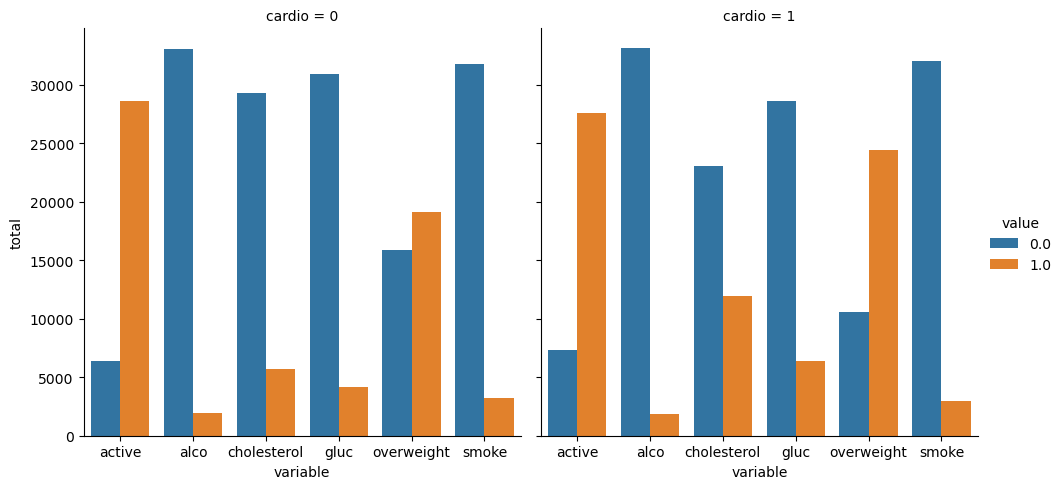

In [7]:
# convert the data into long format and creating a charth using seaborn's catplot()
data_melt = pd.melt(df[["cardio","active","alco","cholesterol","gluc","overweight","smoke"]], id_vars= "cardio")
graph = sns.catplot(x = "variable", hue = "value", data=data_melt, col="cardio", kind="count", sharey= True)
graph.set_axis_labels("variable", "total")
fig = graph.fig
fig.savefig('catplot.png')

In [8]:
#first and last 2.5% data cleaning
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & 
                                              (df['height'] <= df['height'].quantile(0.0975)) &
                                              (df['weight'] >= df['weight'].quantile(0.025)) &
                                              (df['weight'] <= df['weight'].quantile(0.0975))]

In [9]:
#calculating the correlation
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.039759,0.038484,-0.049084,-0.022165,0.021315,0.005932,0.006314,-0.010745,0.028250,0.031695,0.004812,0.029457,0.009545
age,0.039759,1.000000,0.015344,-0.017676,-0.008638,0.292969,0.200912,0.093770,0.038653,0.031946,0.053338,-0.023809,0.312721,-0.029565
sex,0.038484,0.015344,1.000000,-0.011131,-0.062326,0.018764,0.028122,-0.000378,-0.036186,0.263395,0.160705,-0.022630,-0.075704,-0.033330
height,-0.049084,-0.017676,-0.011131,1.000000,0.075152,-0.011940,0.004343,-0.012052,0.001919,-0.011755,-0.003477,0.003599,-0.054668,-0.302861
weight,-0.022165,-0.008638,-0.062326,0.075152,1.000000,0.063574,0.065963,0.036954,0.003723,-0.058967,-0.007037,0.000491,0.048752,0.429795
ap_hi,0.021315,0.292969,0.018764,-0.011940,0.063574,1.000000,0.735286,0.126747,0.061147,0.015559,0.064636,-0.022311,0.424138,0.042230
ap_lo,0.005932,0.200912,0.028122,0.004343,0.065963,0.735286,1.000000,0.067174,0.032012,0.043869,0.067375,0.004203,0.299570,0.012599
cholesterol,0.006314,0.093770,-0.000378,-0.012052,0.036954,0.126747,0.067174,1.000000,0.333116,0.046537,0.054226,-0.013865,0.241760,0.053106
gluc,-0.010745,0.038653,-0.036186,0.001919,0.003723,0.061147,0.032012,0.333116,1.000000,0.002137,0.021995,0.004651,0.090301,0.018915
smoke,0.028250,0.031946,0.263395,-0.011755,-0.058967,0.015559,0.043869,0.046537,0.002137,1.000000,0.255303,0.060318,0.007047,-0.062876


In [10]:
mask = np.triu(np.ones_like(corr, dtype=bool)) 
#We need to set a mask for upper-triangle heatmap.
#Therefore, only False values will be shown in cells.

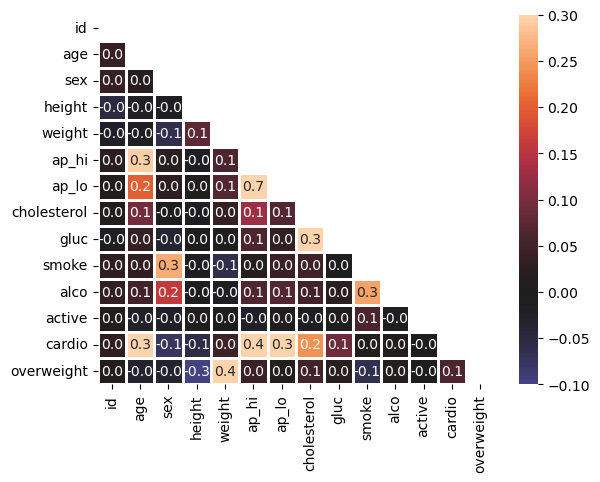

In [11]:
# Draw the heatmap with the mask and correct aspect ratio
fig = sns.heatmap(corr, mask=mask, square=False, linewidths=1, center=0.0, vmin=-0.1, vmax=0.3, annot=True, fmt='.1f').get_figure()
fig